In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce

In [2]:
data = pd.read_csv("insurance.csv")
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

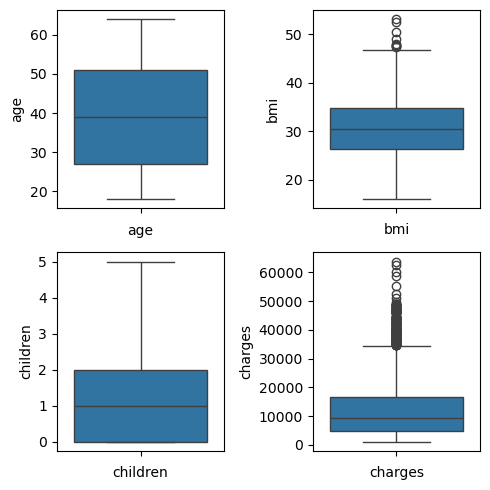

In [6]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (5,5))
plt1 = sns.boxplot(data['age'], ax = axs[0,0]).set(xlabel= 'age')
plt3 = sns.boxplot(data['bmi'], ax = axs[0,1]).set(xlabel='bmi')
plt1 = sns.boxplot(data['children'], ax = axs[1,0]).set(xlabel='children')
plt3 = sns.boxplot(data['charges'], ax = axs[1,1]).set(xlabel='charges')

plt.tight_layout()

In [7]:
Q1 = data.bmi.quantile(0.25)
Q3 = data.bmi.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.bmi >= Q1 - 1.5*IQR) & (data.bmi <= Q3 + 1.5*IQR)]
print(Q3,Q1)

34.69375 26.29625


In [8]:
len(data)

1329

In [9]:
Q1 = data.charges.quantile(0.25)
Q3 = data.charges.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.charges >= Q1 - 1.5*IQR) & (data.charges <= Q3 + 1.5*IQR)]
print(Q3,Q1)

16586.49771 4738.2682


In [10]:
len(data)

1191

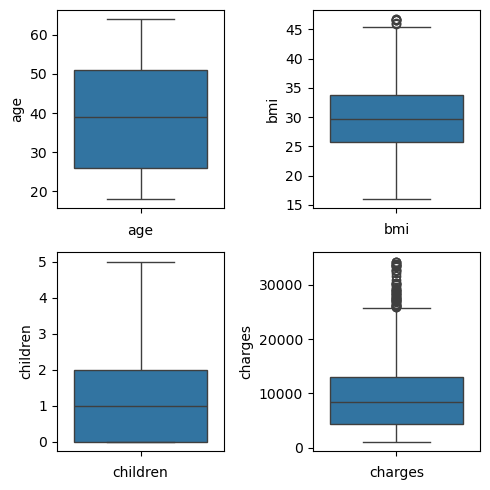

In [11]:
fig, axs = plt.subplots(2,2, figsize = (5,5))
plt1 = sns.boxplot(data['age'], ax = axs[0,0]).set(xlabel= 'age')
plt3 = sns.boxplot(data['bmi'], ax = axs[0,1]).set(xlabel='bmi')
plt1 = sns.boxplot(data['children'], ax = axs[1,0]).set(xlabel='children')
plt3 = sns.boxplot(data['charges'], ax = axs[1,1]).set(xlabel='charges')

plt.tight_layout()

In [12]:
Q1 = data.bmi.quantile(0.25)
Q3 = data.bmi.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.bmi >= Q1 - 1.5*IQR) & (data.bmi <= Q3 + 1.5*IQR)]
print(Q3,Q1)

33.77 25.8


In [13]:
Q1 = data.charges.quantile(0.25)
Q3 = data.charges.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.charges >= Q1 - 1.5*IQR) & (data.charges <= Q3 + 1.5*IQR)]
print(Q3,Q1)

12979.854925 4411.92735


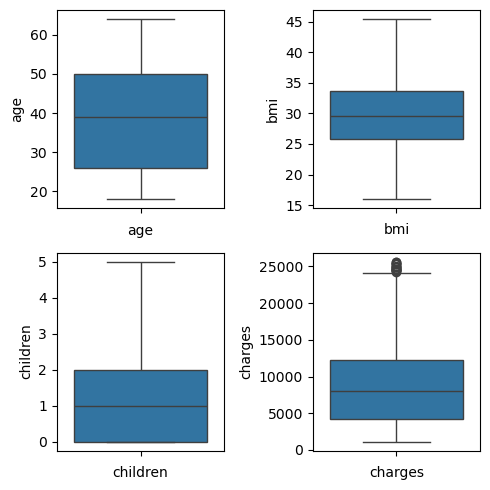

In [14]:
fig, axs = plt.subplots(2,2, figsize = (5,5))
plt1 = sns.boxplot(data['age'], ax = axs[0,0]).set(xlabel= 'age')
plt3 = sns.boxplot(data['bmi'], ax = axs[0,1]).set(xlabel='bmi')
plt1 = sns.boxplot(data['children'], ax = axs[1,0]).set(xlabel='children')
plt3 = sns.boxplot(data['charges'], ax = axs[1,1]).set(xlabel='charges')

plt.tight_layout()

In [15]:
Q1 = data.charges.quantile(0.25)
Q3 = data.charges.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.charges >= Q1 - 1.5*IQR) & (data.charges <= Q3 + 1.5*IQR)]
print(Q3,Q1)

12234.8336 4252.167025


In [16]:
Q1 = data.charges.quantile(0.25)
Q3 = data.charges.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.charges >= Q1 - 1.5*IQR) & (data.charges <= Q3 + 1.5*IQR)]
print(Q3,Q1)

11966.89705 4187.1055


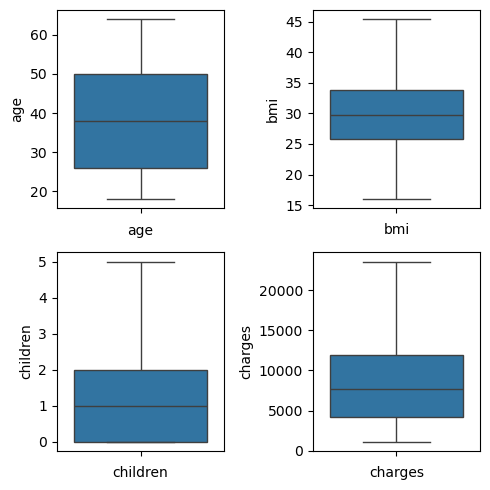

In [17]:
fig, axs = plt.subplots(2,2, figsize = (5,5))
plt1 = sns.boxplot(data['age'], ax = axs[0,0]).set(xlabel= 'age')
plt3 = sns.boxplot(data['bmi'], ax = axs[0,1]).set(xlabel='bmi')
plt1 = sns.boxplot(data['children'], ax = axs[1,0]).set(xlabel='children')
plt3 = sns.boxplot(data['charges'], ax = axs[1,1]).set(xlabel='charges')

plt.tight_layout()

In [18]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

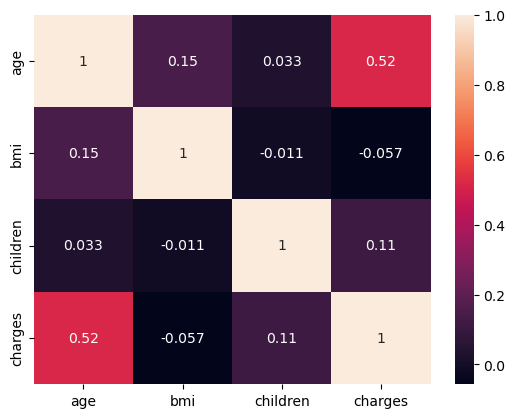

In [19]:
#Correlation of output with numerical variables
dataplot = sns.heatmap(data[['age', 'bmi', 'children', 'charges']].corr(), annot=True)
plt.show()

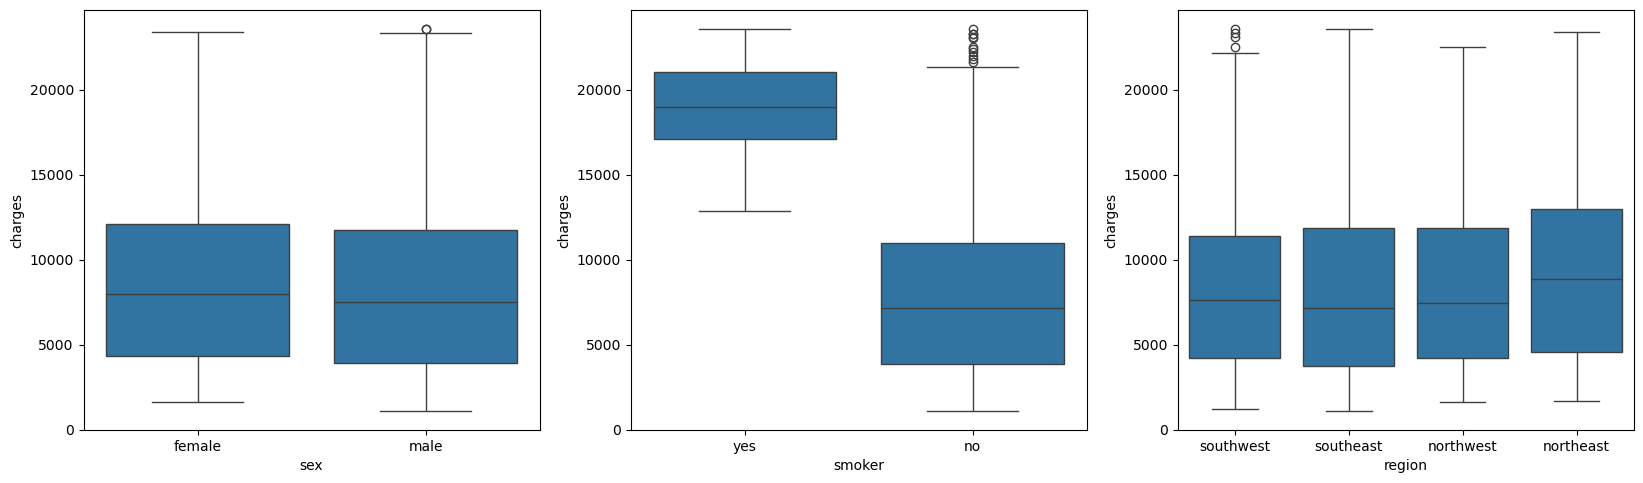

In [20]:
## categorical features visualization

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'sex', y = 'charges', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'smoker', y = 'charges', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'region', y = 'charges', data = data)
plt.show()

In [21]:
encoder = ce.OneHotEncoder()

In [22]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
sex = ce.BinaryEncoder().fit_transform(data['sex'])
print(sex)

      sex_0  sex_1
0         0      1
1         1      0
2         1      0
3         1      0
4         1      0
...     ...    ...
1332      0      1
1333      1      0
1334      0      1
1335      0      1
1336      0      1

[1105 rows x 2 columns]


In [24]:
smoker = ce.BinaryEncoder().fit_transform(data['smoker'])
print(smoker)

      smoker_0  smoker_1
0            0         1
1            1         0
2            1         0
3            1         0
4            1         0
...        ...       ...
1332         1         0
1333         1         0
1334         1         0
1335         1         0
1336         1         0

[1105 rows x 2 columns]


In [25]:
region = encoder.fit_transform(data['region'])
print(region)
data.head()

      region_1  region_2  region_3  region_4
0            1         0         0         0
1            0         1         0         0
2            0         1         0         0
3            0         0         1         0
4            0         0         1         0
...        ...       ...       ...       ...
1332         1         0         0         0
1333         0         0         1         0
1334         0         0         0         1
1335         0         1         0         0
1336         1         0         0         0

[1105 rows x 4 columns]


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
data = pd.concat([data, sex, region, smoker], axis = 1)
data.drop(['sex','region','smoker'], axis = 1, inplace = True)
data.head(10)

,age,bmi,children,charges,sex_0,sex_1,region_1,region_2,region_3,region_4,smoker_0,smoker_1
0,19,27.900,0,16884.92400,0,1,1,0,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,0,1,0,1,0
4,32,28.880,0,3866.85520,1,0,0,0,1,0,1,0
5,31,25.740,0,3756.62160,0,1,0,1,0,0,1,0
6,46,33.440,1,8240.58960,0,1,0,1,0,0,1,0
7,37,27.740,3,7281.50560,0,1,0,0,1,0,1,0
8,37,29.830,2,6406.41070,1,0,0,0,0,1,1,0
10,25,26.220,0,2721.32080,1,0,0,0,0,1,1,0


In [27]:
data.head()

,age,bmi,children,charges,sex_0,sex_1,region_1,region_2,region_3,region_4,smoker_0,smoker_1
0,19,27.900,0,16884.92400,0,1,1,0,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,0,1,0,1,0
4,32,28.880,0,3866.85520,1,0,0,0,1,0,1,0


In [28]:
features = list(data.columns)
df_train, df_test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 100)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(df_train)
x_test = scaler.transform(df_test)

In [29]:
y_train = df_train.pop('charges')
x_train = df_train
y_test = df_test.pop('charges')
x_test = df_test
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [30]:
print(lr_model.coef_)

[  239.1707111     31.75563752   452.80666718  -162.5206322
   162.5206322   -359.6358274   -443.6903003    126.13625084
   677.18987686 -6386.08391516  6386.08391516]


In [40]:
importance = np.array(lr_model.coef_)
importance = importance / sum(importance)
print(importance )

[ 0.33046815  0.04387756  0.62565429 -0.22455882  0.22455882 -0.49691781
 -0.61305798  0.17428561  0.93569018 -8.82381179  8.82381179]


In [41]:
for z in range(len(list(x_train.columns))):
    print("The Importance coefficient for {} is {}".format(x_train.columns[z], importance[z]))

The Importance coefficient for age is 0.33046815037965604
The Importance coefficient for bmi is 0.04387755819272605
The Importance coefficient for children is 0.6256542914276116
The Importance coefficient for sex_0 is -0.22455882024057133
The Importance coefficient for sex_1 is 0.2245588202405746
The Importance coefficient for region_1 is -0.4969178129953673
The Importance coefficient for region_2 is -0.6130579794197983
The Importance coefficient for region_3 is 0.17428561097846815
The Importance coefficient for region_4 is 0.9356901814366951
The Importance coefficient for smoker_0 is -8.823811786645107
The Importance coefficient for smoker_1 is 8.823811786645113


In [42]:
print(lr_model.intercept_)

3230.469521040377


Text(0.5, 0, 'Errors')

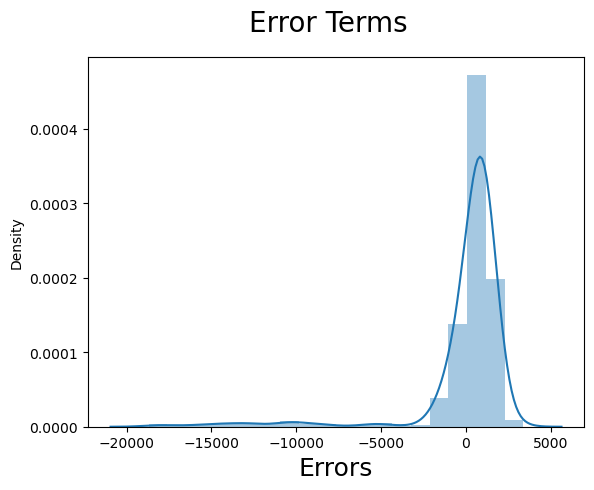

In [32]:
y_train_pred = lr_model.predict(x_train)
residuals = (y_train_pred - y_train)
fig = plt.figure()
sns.distplot(residuals, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)   

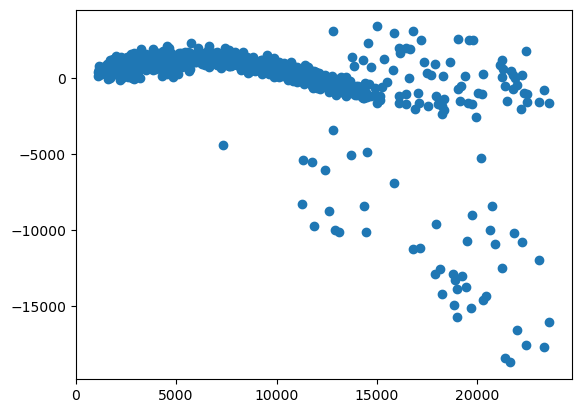

In [33]:
plt.scatter(y_train,residuals)
plt.show()

In [34]:
y_test_pred = lr_model.predict(x_test)

In [35]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
r2_score(y_test, y_test_pred)

0.6420628830792943

In [36]:
mean_absolute_percentage_error(y_test, y_test_pred)

0.19259997097306017

In [37]:
print("Training Error: ",mean_squared_error(y_train, y_train_pred))
print("Testing Error: ",mean_squared_error(y_test, y_test_pred))

Training Error:  8457241.407953264
Testing Error:  11829257.4954999


Text(0, 0.5, 'y_test_pred')

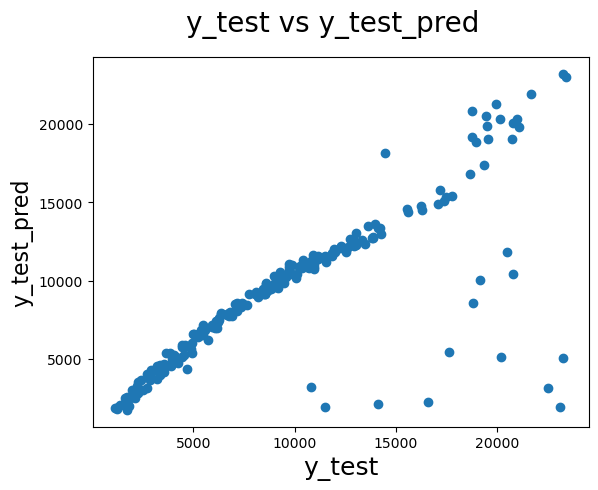

In [38]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)      
plt.ylabel('y_test_pred', fontsize=16)  